In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, pathlib
from detect import Detector#
import math

In [3]:
def convert_to_positive_radian(angle):
    if angle < 0:
        return angle + 2*math.pi
    return angle

In [4]:
root = pathlib.Path()
print(root)
os.listdir(root)

.


['.git',
 '.gitignore',
 'actual_turret_video.mp4',
 'Controller.py',
 'data.yaml',
 'detect.py',
 'detections.csv',
 'edgetpumodel.py',
 'LICENSE.md',
 'models',
 'nms.py',
 'README.md',
 'utils.py',
 'velocity.ipynb',
 'velocity.py',
 '__pycache__']

In [3]:
print(root/"actual_turret_video.mp4")

actual_turret_video.mp4


In [4]:
detector = Detector(model=root/'models'/'best_new.pt',names=root/'data.yaml', stream=False, video = "actual_turret_video.mp4", edge=False, conf_thresh=0.4)

c:\Users\timko\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\timko/.cache\torch\hub\master.zip
YOLOv5  2023-9-2 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 
INFO:detect:Opening video file: actual_turret_video.mp4


In [5]:
spf = 1/30

In [6]:
detections = []
for i in range(3540):
    frame = detector.getNextFrame()
    x = detector.detectFrame(frame, draw_img=False)
    if len(x.xyxy[0]) > 0:
        y = x.xyxy[0].tolist()
        for j in y:
            j.append(spf*i)
            detections.append(j)
columnHeaders = ["tl_x", "tl_y", "br_x", "br_y", "confidence", "class", "t"]
df = pd.DataFrame(detections, columns=columnHeaders)


In [7]:
df.head()

,tl_x,tl_y,br_x,br_y,confidence,class,t
0,147.430847,409.775391,245.664520,455.336548,0.907224,0.0,0.000000
1,147.497223,408.759033,242.588959,453.711426,0.903024,0.0,0.033333
2,140.953613,406.961090,246.450623,451.215851,0.890284,0.0,0.066667
3,135.916702,404.187592,249.219345,449.574310,0.884727,0.0,0.100000
4,135.781708,399.232391,248.747894,449.611664,0.893167,0.0,0.133333


In [8]:
df.drop(columns=["confidence", "class"], inplace=True)

In [9]:
df

,tl_x,tl_y,br_x,br_y,t
0,147.430847,409.775391,245.664520,455.336548,0.000000
1,147.497223,408.759033,242.588959,453.711426,0.033333
2,140.953613,406.961090,246.450623,451.215851,0.066667
3,135.916702,404.187592,249.219345,449.574310,0.100000
4,135.781708,399.232391,248.747894,449.611664,0.133333
...,...,...,...,...,...
785,419.340881,231.983887,466.186890,260.267944,112.866667
786,412.783325,239.474304,459.330261,268.040436,112.900000
787,407.845276,244.879272,451.016602,273.824219,112.933333
788,400.839478,251.006653,452.894531,279.209412,112.966667


In [10]:
df.to_csv("detections.csv")

In [6]:
df = pd.read_csv("detections.csv")

In [7]:
df

,Unnamed: 0,tl_x,tl_y,br_x,br_y,t
0,0,147.430847,409.775391,245.664520,455.336548,0.000000
1,1,147.497223,408.759033,242.588959,453.711426,0.033333
2,2,140.953613,406.961090,246.450623,451.215851,0.066667
3,3,135.916702,404.187592,249.219345,449.574310,0.100000
4,4,135.781708,399.232391,248.747894,449.611664,0.133333
...,...,...,...,...,...,...
785,785,419.340881,231.983887,466.186890,260.267944,112.866667
786,786,412.783325,239.474304,459.330261,268.040436,112.900000
787,787,407.845276,244.879272,451.016602,273.824219,112.933333
788,788,400.839478,251.006653,452.894531,279.209412,112.966667


In [8]:
df["mx"] = (df["br_x"] - df["tl_x"])/2 + df["tl_x"]
df["my"] = (df["br_y"] - df["tl_y"])/2 + df["tl_y"]

In [9]:
df.head()

,Unnamed: 0,tl_x,tl_y,br_x,br_y,t,mx,my
0,0,147.430847,409.775391,245.664520,455.336548,0.000000,196.547684,432.555969
1,1,147.497223,408.759033,242.588959,453.711426,0.033333,195.043091,431.235229
2,2,140.953613,406.961090,246.450623,451.215851,0.066667,193.702118,429.088470
3,3,135.916702,404.187592,249.219345,449.574310,0.100000,192.568024,426.880951
4,4,135.781708,399.232391,248.747894,449.611664,0.133333,192.264801,424.422028


In [10]:
df.drop(columns=["Unnamed: 0", "tl_x", "tl_y", "br_x", "br_y"], inplace=True)

In [11]:
df.head()

,t,mx,my
0,0.000000,196.547684,432.555969
1,0.033333,195.043091,431.235229
2,0.066667,193.702118,429.088470
3,0.100000,192.568024,426.880951
4,0.133333,192.264801,424.422028


In [12]:
df_velocities = df.diff()
df_velocities.drop(index=df.index[0], axis=0, inplace=True)
df_velocities.rename(columns={"mx": "dx", "my": "dy", "t" : "dt"}, inplace=True)

In [13]:
df_velocities["speed"] = np.linalg.norm(df_velocities[["dx", "dy"]].values, axis=1)/df_velocities["dt"]
df_velocities["angle"] = np.arctan2(df_velocities["dy"], df_velocities["dx"]).apply(convert_to_positive_radian)

In [14]:
df_velocities.drop(columns=["dt", "dx", "dy"], inplace=True)
df_velocities.reset_index(inplace=True)

In [15]:
df_velocities["anglemin"] = (df_velocities["angle"] - math.pi/3) % (2*math.pi)
df_velocities["anglemax"] = (df_velocities["angle"] + math.pi/3) % (2*math.pi)

In [16]:
df_velocities.head()

,index,speed,angle,anglemin,anglemax
0,1,60.061118,3.862009,2.814812,4.909207
1,2,75.934869,4.154041,3.106844,5.201239
2,3,74.453885,4.237809,3.190611,5.285006
3,4,74.326463,4.589693,3.542496,5.636891
4,5,67.906495,4.054761,3.007563,5.101958


In [17]:
df_time = pd.read_csv("detections.csv")

In [18]:
df_time.drop(columns=["Unnamed: 0", "tl_x", "tl_y", "br_x", "br_y"], inplace=True)
df_time.drop(index=df.index[0], axis=0, inplace=True)
df_time.reset_index(inplace=True)

In [19]:
df_velocities["t"] = df_time["t"]
df_velocities["dt"] = df_velocities["t"].diff()

In [20]:
df_velocities.head()

,index,speed,angle,anglemin,anglemax,t,dt
0,1,60.061118,3.862009,2.814812,4.909207,0.033333,NaN
1,2,75.934869,4.154041,3.106844,5.201239,0.066667,0.033333
2,3,74.453885,4.237809,3.190611,5.285006,0.100000,0.033333
3,4,74.326463,4.589693,3.542496,5.636891,0.133333,0.033333
4,5,67.906495,4.054761,3.007563,5.101958,0.166667,0.033333


In [1]:
def angle_within_range(angle, min_angle, max_angle):
    if min_angle < max_angle:
        return angle > min_angle and angle < max_angle
    return angle > min_angle or angle < max_angle

In [22]:
series_column = []
series = 0
for i in range(len(df_velocities)):
    if i == 0:
        series_column.append(series)
        continue
    if df_velocities.loc[i, "dt"] > 0.5:
        series += 1
    elif not angle_within_range(df_velocities.loc[i, "angle"], df_velocities.loc[i-1, "anglemin"], df_velocities.loc[i-1, "anglemax"]):
        series += 1
    series_column.append(series)

In [45]:
df_velocities["series"] = series_column

In [46]:
df_velocities.head()

,index,speed,angle,anglemin,anglemax,t,dt,series
0,1,60.061118,3.862009,2.814812,4.909207,0.033333,NaN,0
1,2,75.934869,4.154041,3.106844,5.201239,0.066667,0.033333,0
2,3,74.453885,4.237809,3.190611,5.285006,0.100000,0.033333,0
3,4,74.326463,4.589693,3.542496,5.636891,0.133333,0.033333,0
4,5,67.906495,4.054761,3.007563,5.101958,0.166667,0.033333,0


In [47]:
series = df_velocities["series"].value_counts()

In [ ]:
for i, serie in enumerate(series):
    print(i, serie, series[i])

In [115]:
count = 1
for i, serie in enumerate(series):
    avgSum = 0
    avg = None
    for j in range(series[i]):
        angle = df_velocities.loc[df_velocities["index"] == count, "angle"].values[0]
        if j == 0:
            avg = angle
            avgSum += angle
            count += 1
            continue
        if avg < (2/3)*math.pi and angle > (5/3)*math.pi:
            angle -= 2*math.pi
        elif avg > (4/3)*math.pi and angle < (1/3)*math.pi:
            angle += 2*math.pi
        avgSum += angle
        avg = avgSum/(j+1)
        df_velocities.loc[df_velocities["index"] == count, "angle"] = angle
        count += 1
        

0.2030441415397988
0.2030441415397988
-0.2768327726210824
-0.2768327726210824
0.16432396349868372
0.16432396349868372
1.0337982376039014
1.0337982376039014
0.8699762902483539
0.8699762902483539
0.029517553719664486
0.029517553719664486
0.24060032963280373
0.24060032963280373
0.4351784458407598
0.4351784458407598
0.5784420470431435
0.5784420470431435
0.4974863059358399
0.4974863059358399
0.5796669217198772
0.5796669217198772
0.7945862814277812
0.7945862814277812
0.7868491791231584
0.7868491791231584
0.41219187275780156
0.41219187275780156
0.1777100755475599
0.1777100755475599
0.5602466503733929
0.5602466503733929
0.3692977371018037
0.3692977371018037
0.40435198691144614
0.40435198691144614
0.07708343964070594
0.07708343964070594
0.0030084279792901114
0.0030084279792901114
-0.07683278908534596
-0.07683278908534596
-0.2297389374923382
-0.2297389374923382
0.027430935140862162
0.027430935140862162
0.03621177228954119
0.03621177228954119
0.2545587680636866
0.2545587680636866
0.42396940353521

In [116]:
df_velocities.loc[df_velocities["series"] == 43].head()

,index,speed,angle,anglemin,anglemax,t,dt,series
233,234,40.486806,0.515559,5.751546,1.562756,33.533333,0.033333,43
234,235,33.711945,0.203044,5.439032,1.250242,33.566667,0.033333,43
235,236,54.969541,-0.276833,4.959155,0.770365,33.600000,0.033333,43
236,237,69.966633,0.164324,5.400312,1.211522,33.633333,0.033333,43
237,238,67.617509,1.033798,6.269786,2.080996,33.666667,0.033333,43


In [117]:
indexes = series[series > 25].index

In [118]:
indexes

Int64Index([12, 43, 198, 23, 200, 195], dtype='int64')

In [119]:
indexes = indexes.tolist()

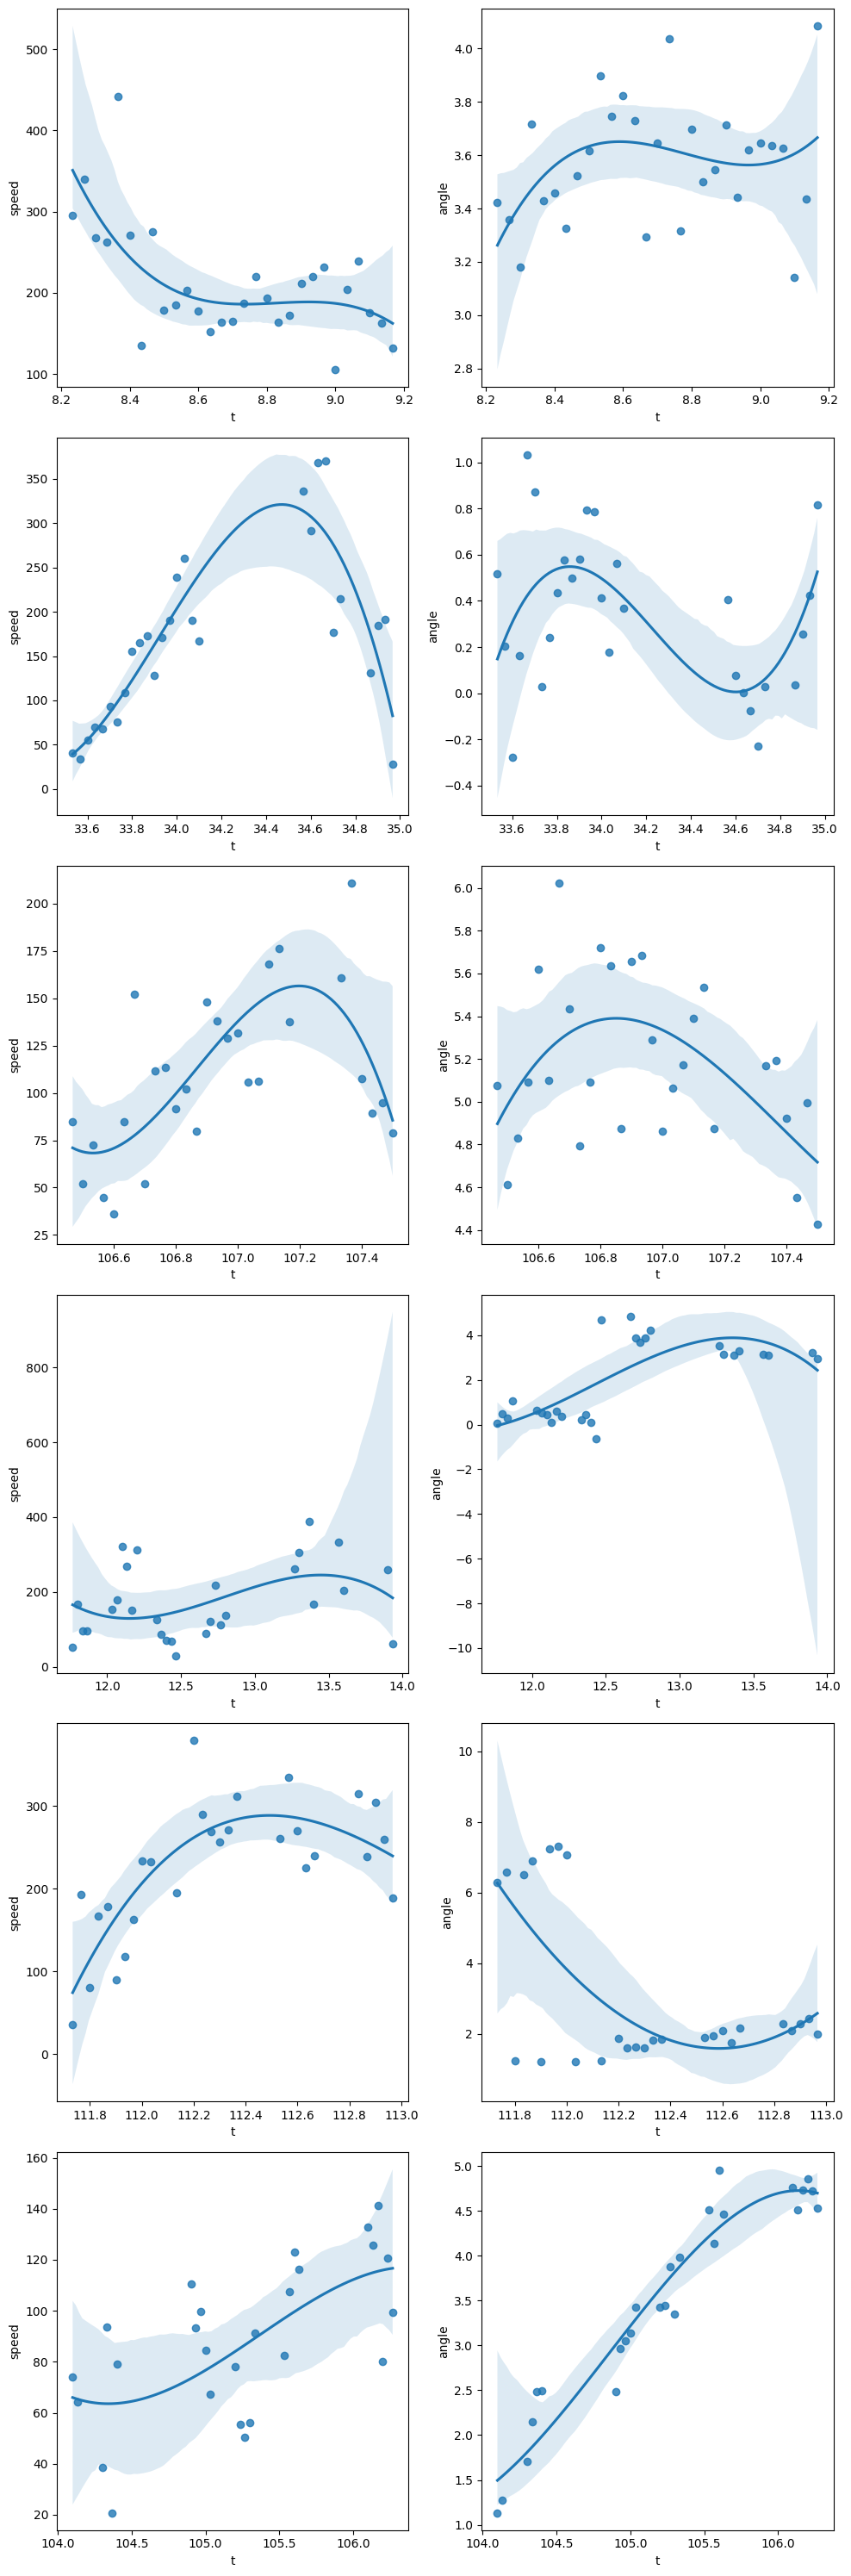

In [120]:
items = ["speed", "angle"] * len(indexes)
number_series = len(indexes) * 2
number_of_columns = 2
number_of_rows = math.ceil(number_series / number_of_columns)
fig, ax = plt.subplots(number_of_rows, 
                       number_of_columns, 
                       figsize=(number_of_columns * 5, number_of_rows * 5))
for i, item in enumerate(items):
    sns.regplot(data=df_velocities[df_velocities["series"] == indexes[i//2]], 
                    x="t",#"speed", 
                    y=item,
                    ax=ax[i//number_of_columns, i%number_of_columns],
                    ci=97,
                    order=3)
#sns.scatterplot(data=df_velocities, x="speed", y="angle", hue="series",ax=ax, palette="seismic", legend="full")
#plt.show()
fig.tight_layout()

In [ ]:
def angle_within_range(angle, min_angle, max_angle):
    if min_angle < max_angle:
        return angle > min_angle and angle < max_angle
    return angle > min_angle or angle < max_angle